# Regularization Decision Boundaries

Version 1.0

(C) 2020 - Umberto Michelucci, Michela Sperti

This notebook is part of the book _Applied Deep Learning: a case based approach, **2nd edition**_ from APRESS by [U. Michelucci](mailto:umberto.michelucci@toelt.ai) and [M. Sperti](mailto:michela.sperti@toelt.ai).

The purpose of this notebook is to show you the effect of $L_2$ regularization in an intuitive and visual way.

## Notebook Learning Goals

At the end of this notebook you will understand how $L_2$ regularization affects the decision boundary of a deep neural network. You will also notice that regularizing a model means making it more simple and that you can compare decision boundaries coming from a regularized deep neural network with those coming from a very simple network (like for example a network made of one single neuron).

## Libraries Import

This section contains the necessary libraries (such as tensorflow or pandas) you need to import to run the notebook.

In [ ]:
# general libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# tensorflow libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# sklearn libraries
from sklearn import linear_model

## Dataset Generation

For this example, we will consider a dataset generated with the following code.

In [ ]:
nobs = 30 # number of observations
np.random.seed(42) # making results reproducible

# first set of observations
xx1 = np.array([np.random.normal(0.3, 0.15) for i in range (0, nobs)])
yy1 = np.array([np.random.normal(0.3, 0.15) for i in range (0, nobs)])
# second set of observations
xx2 = np.array([np.random.normal(0.1, 0.1) for i in range (0, nobs)])
yy2 = np.array([np.random.normal(0.3, 0.1) for i in range (0, nobs)])
# concatenating observations
c1_ = np.c_[xx1.ravel(), yy1.ravel()]
c2_ = np.c_[xx2.ravel(), yy2.ravel()] 
c = np.concatenate([c1_, c2_])
# creating the labels
yy1_ = np.full(nobs, 0, dtype = int)
yy2_ = np.full(nobs, 1, dtype = int)
yyL = np.concatenate((yy1_, yy2_), axis = 0)
# defining training points and labels
train_x = c
train_y = yyL

Our dataset has two features: $x$ and $y$. Two group of points have been generated from a normal distribution:
- (`xx1`, `yy1`), of class 0 
- (`xx2`, `yy2`), of class 1

## Feed-forward Networks with 4 Layers and 20 Neurons

Now, let's train and evaluate a feed-forward neural network made of 4 layers with 20 neurons each on the generated dataset, without regularization and let's print its decision boundary.

In [ ]:
def create_and_train_regularized_model(data_train_norm, labels_train, num_neurons, num_layers, n_epochs, lambda_):
    # build model
    inputs = keras.Input(shape = data_train_norm.shape[1]) # input layer
    # he initialization
    initializer = tf.keras.initializers.HeNormal()
    # regularization
    reg = tf.keras.regularizers.l2(l2 = lambda_)
    # first hidden layer
    dense = layers.Dense(num_neurons, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = reg)(inputs)
    # customized number of layers and neurons per layer
    for i in range(num_layers - 1):       
        dense = layers.Dense(num_neurons, activation = 'relu', kernel_initializer = initializer, kernel_regularizer = reg)(dense)
    # output layer   
    outputs = layers.Dense(1, activation = 'sigmoid')(dense)
    model = keras.Model(inputs = inputs, outputs = outputs, name = 'model')
    # set optimizer and loss
    opt = keras.optimizers.Adam(learning_rate = 0.005)
    model.compile(loss = 'binary_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    # train model
    history = model.fit(
      data_train_norm, labels_train,
      epochs = n_epochs, verbose = 0,
      batch_size = data_train_norm.shape[0])
    # save performances
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch 

    return hist, model

In the following line we train the model.

In [ ]:
hist, model = create_and_train_regularized_model(train_x, train_y, 20, 4, 100, 0.0)

### Decision Boundary

The following functions are needed to create the mesh and plot the decision boundary for our example.

In [ ]:
def make_mesh_predict(h, c1, clf):
    """
    Inputs:
    h -> mesh step (0.001 is a good value if you move between 0 and 1)
    c1 -> your training data
    clf -> your model
    
    Outputs:
    xx -> x values of the mesh
    yy -> y values of the mesh
    Z -> the prediction (the color of each point)
    """   
    # point in the mesh [x_min, x_max] x [y_min, y_max].
    x_min, x_max = c1[:, 0].min() - .2, c1[:, 0].max() + .2
    y_min, y_max = c1[:, 1].min() - .2, c1[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    
    Z = Z.reshape(xx.shape)
    
    return xx, yy, Z

In [ ]:
def print_decision_boundary(xx, yy, Z, X, Y):
    """
    Inputs:
    xx: the values for the mesh (coming from make_mesh_predict())
    yy: the values for the mesh (coming from make_mesh_predict())
    Z: the prediction for each point (that will be mapped to the color)
    X,Y: the training points
    """
    fig = plt.figure(figsize = (9, 7))
    ax = fig.add_subplot(111)
    plt.pcolormesh(xx, yy, Z, cmap = 'Greys', alpha = 0.1)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c = Y * 100, edgecolors = 'k',  s = 40, cmap = 'gray')
    plt.xlabel('$x$')
    plt.ylabel('$y$')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    
    #fig.savefig('Figure16-7.png', dpi = 300)
    plt.show()

In [ ]:
xx, yy, Z = make_mesh_predict(0.001, train_x, model)

Now we print the decision boundary in the case of a feed-forward neural network without regularization. White points are of class 0, and black points of class 1. The gray area is the region that the network classifies as being of one class, and the white area as being of the other class.

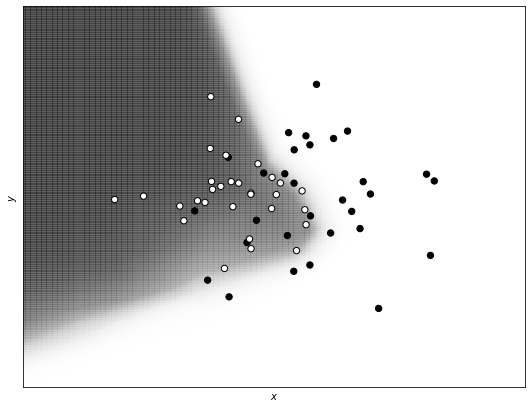

In [ ]:
print_decision_boundary(xx, yy, Z, train_x, train_y)

Notice that the feed-forward network without regularization (and with many neurons and layers) is able to capture the complex structure of the data in a flexible way.

Remember that to fairly evaluate a model you need to split the data in different parts (to avoid overfitting). Here we are just not considering this case and we are simplifying the problem, since our main interest is to look at different decision boundaries and to understand the level of complexity of networks with and without regularization. 

## Regularized Feed-forward Networks with 4 Layers and 20 Neurons ($\lambda = 0.04$)

Now, let's apply regularization to the network ($\lambda = 0.04$) and see how the decision boundary changes.

In [ ]:
hist_reg, model_reg = create_and_train_regularized_model(train_x, train_y, 20, 4, 100, 0.04)

### Decision Boundary

In [ ]:
xx, yy, Z = make_mesh_predict(0.001, train_x, model_reg)

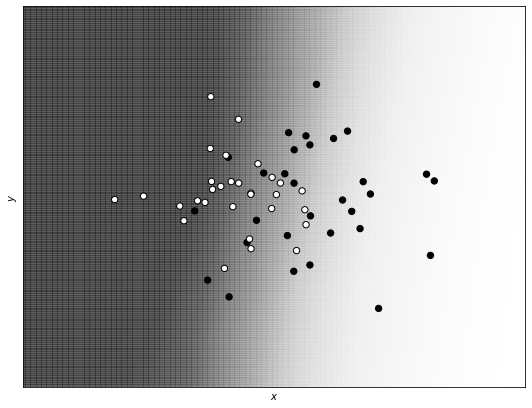

In [ ]:
print_decision_boundary(xx, yy, Z, train_x, train_y)

As you can see, the regularization term makes the model simpler, with a decision boundary less complex and therefore less able to capture the fine structure of the data.

## Logistic Regression

Let's finally compare the regularized version with a very simple model: logistic regression (meaning a neural network with just one neuron).

In [ ]:
logreg = linear_model.LogisticRegression()
logreg.fit(train_x, train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Decision Boundary

In [ ]:
xx1, yy1, Z1 = make_mesh_predict(0.001, train_x, logreg)

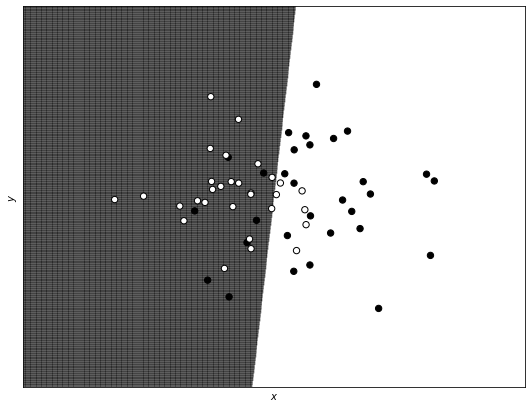

In [ ]:
print_decision_boundary(xx1, yy1, Z1, train_x, train_y)

You can see that also in this case we have a very straight and simple decision boundary, similar to the one obtained by the regularized version of the network (only less smooth).

## Visual Comparison of Regularized Network and Logistic Regression Decision Boundaries

To see the results more clearly, let us plot an overlap version of the decision boundary coming from the regularized model and the logistic regression one. As you can see, they are almost the same and both linear (so they don't capture the complexity of the dataset).

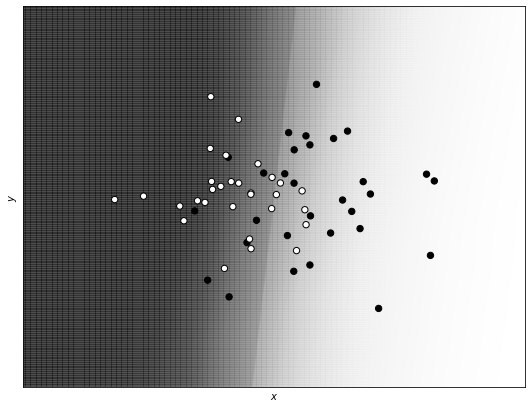

In [ ]:
fig = plt.figure(figsize = (9, 7))
plt.pcolormesh(xx1, yy1, Z1, cmap = 'Greys', alpha = 0.02)
plt.pcolormesh(xx, yy, Z, cmap = 'Greys', alpha = 0.1)

# Plot also the training points
plt.scatter(train_x[:, 0], train_x[:, 1], c = train_y * 100, edgecolors = 'k',  s = 40, cmap = 'gray') 
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

#fig.savefig('Figure16-8.png', dpi = 300)
plt.show()